In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys

import time

In [2]:
#Q1

driver=webdriver.Chrome()
driver.get("https://www.amazon.in")

In [3]:
guitar=driver.find_element(By.XPATH,'//input[@id="twotabsearchtextbox"]')
guitar.send_keys("guitar")
time.sleep(5)
search=driver.find_element(By.XPATH,'//input[@id="nav-search-submit-button"]')
search.click()

In [4]:
GuitarBrand=[]
GuitarName=[]
Price=[]
Rexchange=[]
ExpectedDelivery=[]
Availablity=[]
ProductUrl=[]

In [5]:
Pricetags = driver.find_elements(By.XPATH, '//span[@class="a-price-whole"]')[2:]
Urltags = driver.find_elements(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
Nametags = driver.find_elements(By.XPATH, '//span[@class="a-size-base-plus a-color-base a-text-normal"]')
Deliverytags=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')

for Nametag in Nametags:
    GuitarName.append(Nametag.text)
    words = Nametag.text.split()
    brand_name = words[0] if words else ""
    GuitarBrand.append(brand_name)

for price in Pricetags:
    Price.append(price.text)
    if price.text != "":
        Availablity.append("Available")
        Rexchange.append("7 days")
    else:
        Availablity.append("-")
        Rexchange.append("-")


for url in Urltags:
    ProductUrl.append(url.get_attribute('href'))

    
for deli in Deliverytags:
    ExpectedDelivery.append(deli.text)


In [6]:

try:
    NextPage = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')))
    NextPage.click()
except TimeoutException:
    print("Timeout occurred while waiting for the next page button to become clickable.")

Pricetags = driver.find_elements(By.XPATH, '//span[@class="a-price-whole"]')[2:]
Urltags = driver.find_elements(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
Nametags = driver.find_elements(By.XPATH, '//span[@class="a-size-base-plus a-color-base a-text-normal"]')
Deliverytags=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')

for Nametag in Nametags:
    GuitarName.append(Nametag.text)
    words = Nametag.text.split()
    brand_name = words[0] if words else ""
    GuitarBrand.append(brand_name)

for price in Pricetags:
    Price.append(price.text)
    if price.text != "":
        Availablity.append("Available")
        Rexchange.append("7 days")
    else:
        Availablity.append("-")
        Rexchange.append("-")


for url in Urltags:
    ProductUrl.append(url.get_attribute('href'))

for deli in Deliverytags:
    ExpectedDelivery.append(deli.text)


Timeout occurred while waiting for the next page button to become clickable.


In [7]:

try:
    NextPage = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')))
    NextPage.click()
except TimeoutException:
    print("Timeout occurred while waiting for the next page button to become clickable.")

Pricetags = driver.find_elements(By.XPATH, '//span[@class="a-price-whole"]')[2:]
Urltags = driver.find_elements(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
Nametags = driver.find_elements(By.XPATH, '//span[@class="a-size-base-plus a-color-base a-text-normal"]')
Deliverytags=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')

for Nametag in Nametags:
    GuitarName.append(Nametag.text)
    words = Nametag.text.split()
    brand_name = words[0] if words else ""
    GuitarBrand.append(brand_name)

for price in Pricetags:
    Price.append(price.text)
    if price.text != "":
        Availablity.append("Available")
        Rexchange.append("7 days")
    else:
        Availablity.append("-")
        Rexchange.append("-")


for url in Urltags:
    ProductUrl.append(url.get_attribute('href'))

for deli in Deliverytags:
    ExpectedDelivery.append(deli.text)

min_length = min(len(GuitarBrand), len(GuitarName), len(Price), len(Rexchange), len(ExpectedDelivery), len(Availablity), len(ProductUrl))

GuitarBrand = GuitarBrand[:min_length]
GuitarName = GuitarName[:min_length]
Price = Price[:min_length]
Rexchange = Rexchange[:min_length]
ExpectedDelivery = ExpectedDelivery[:min_length]
Availablity = Availablity[:min_length]
ProductUrl = ProductUrl[:min_length]


Timeout occurred while waiting for the next page button to become clickable.


In [8]:

df = pd.DataFrame({
    "Name": GuitarName,
    "Brand": GuitarBrand,
    "Price": Price,
    "Return/exchange": Rexchange,
    "Expected Delivery": ExpectedDelivery,
    "Availability": Availablity,
    "Link": ProductUrl
})

df



,Name,Brand,Price,Return/exchange,Expected Delivery,Availability,Link
0,"Kadence rosewood Guitar Frontier Series, Elect...",Kadence,"5,499",7 days,Sunday 31 March,Available,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence Frontier guitar with Online Guitar lea...,Kadence,"4,499",7 days,Sunday 31 March,Available,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence Slowhand Premium Jumbo Semi Acoustic G...,Kadence,"9,999",7 days,"Tomorrow, 30 March",Available,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,MOCKING BIRD 40 inch Acoustic Guitar for Begin...,MOCKING,"5,489",7 days,Wednesday 3 April,Available,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,"Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 0...",Juârez,"1,949",7 days,Wednesday 3 April,Available,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
178,Vault DA20 Dreadnought Acoustic Guitar With Gi...,Vault,"2,199",7 days,Thursday 4 April,Available,https://www.amazon.in/Dreadnought-Acoustic-Gig...
179,"JUAREZ Arpeggio Guitar JRA41MAH, mahogany",JUAREZ,"8,200",7 days,Thursday 4 April,Available,https://www.amazon.in/JUAREZ-Arpeggio-Guitar-J...
180,YAMAHA FX280 Natural Electro Acoustic Guitar,YAMAHA,229,7 days,Thursday 4 April,Available,https://www.amazon.in/Yamaha-FX280-acoustic-Dr...
181,Yamaha FS80C 25 Incheses sprucewood The Ultima...,Yamaha,"3,999",7 days,Thursday 4 April,Available,https://www.amazon.in/Ultimate-Concert-Cutaway...


In [9]:
driver.quit()

In [10]:
#q3
driver=webdriver.Chrome()
driver.get("https://www.google.co.in/")

In [11]:
finder = driver.find_element(By.XPATH, '//textarea[@class="gLFyf"]')
finder.send_keys('fruits images')
time.sleep(5)

In [12]:
search2 = driver.find_element(By.XPATH, '//input[@class="gNO89b"]')
search2.click()


In [13]:
imageselector=driver.find_element(By.XPATH,'//div[@class="crJ18e"]/div[2]/a')
imageselector.click()

In [14]:
fruitsimage=[]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzaojhOdD0JoaLTygkgdkgpjf2Qhn3Hya99g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfarAFccmDz22ZlfrL_vWW9Rxja-7INLgIRA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYIdsjvEGoxzH2uzVbX1UZ6a3L36Y9x4uN1A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQclJ1u3rhxhu7NJAz2BKGI_MLemqy_WiSd5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTimsBtdwqJvT1JUToeAMnRZbG8pDiqqyRS1g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyZSA_ZnjagfnojEoegwYlOs8JkpZxsSYUpQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQYSOjUP2zK1XCpUNkf6rjsTfmkrEidSRKbA&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None
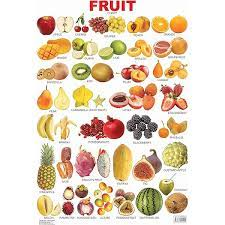
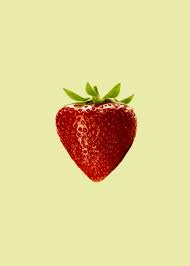
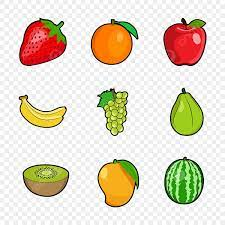
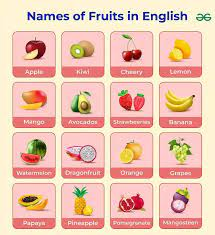
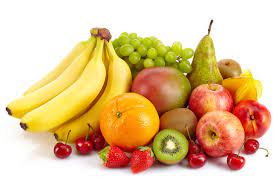
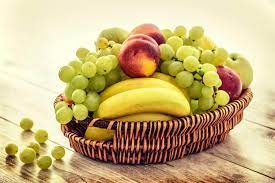
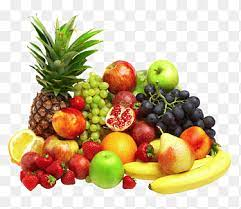
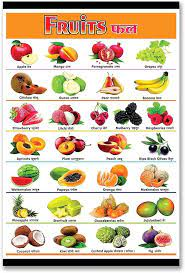
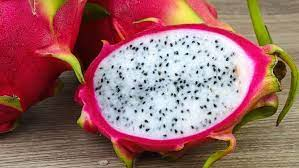
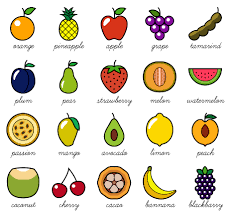

In [19]:
imagetags=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')

for i in imagetags:
    fruitsimage.append(i.get_attribute('src'))
fruitsimage[10:]

In [21]:
driver.quit()

In [23]:
#cars
driver=webdriver.Chrome()
driver.get("https://www.google.co.in/")
finder = driver.find_element(By.XPATH, '//textarea[@class="gLFyf"]')
finder.send_keys('Cars images')
time.sleep(5)

In [24]:
search2 = driver.find_element(By.XPATH, '//input[@class="gNO89b"]')
search2.click()
time.sleep(5)
imageselector=driver.find_element(By.XPATH,'//div[@class="crJ18e"]/div[2]/a')
imageselector.click()

In [26]:
Carimages=[]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXfDuybeVXj-gY90gBow-jFQkJHODbE9lXqw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbWAoawNgvdShgWEIVTFs4q9qstykrIqBLkQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJ0wzUVOOj-foNq1IdxYdmwpRqFCXlb4o7Lw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKUk1aUJVccqkamZ_HBuRtCK7cBONf6nUGtA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEkT-E6JwyYAxyeKHyt3IZY5Q1IqlY05BQNQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxtQFi7627RDMS5gDLjcK5-7dlbupH4uCLoQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRK30Nx64DHqohKqCdZnLHTrjqO760R11tJ_Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQj1HInqOrWpijJzAwZISjwLEXowIQzgWp2Jg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvlU1EPvFsnx
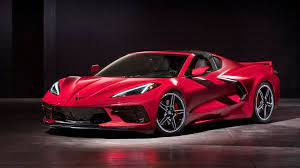
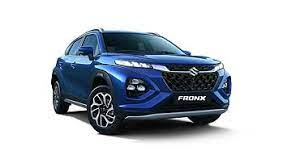
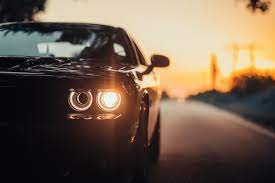
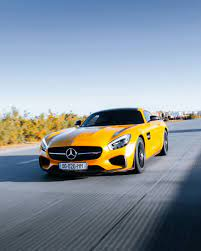
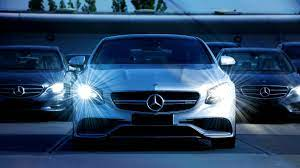
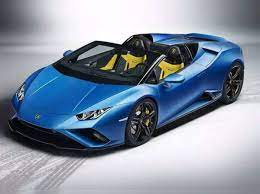
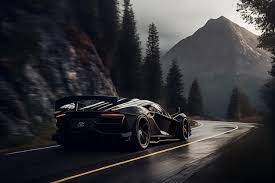
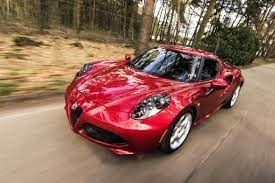
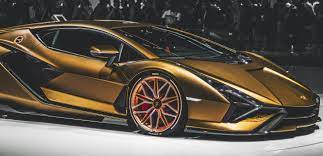
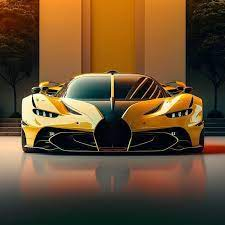
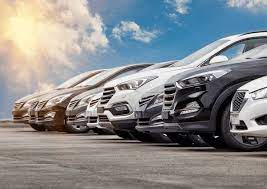
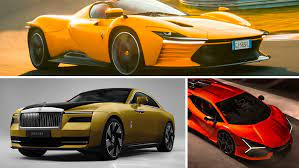
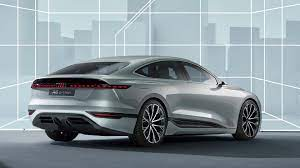
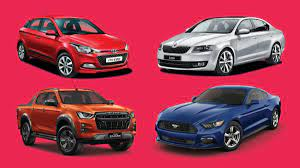
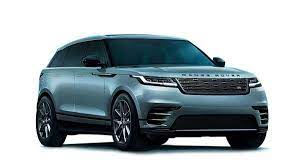
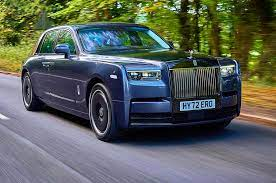
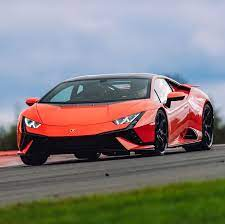
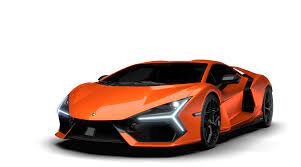
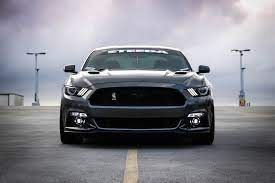
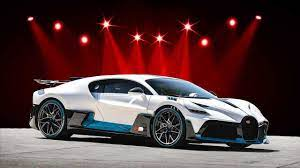

In [27]:
imagetags2 = driver.find_elements(By.XPATH, '//div[@class="fR600b islir"]/img')

for i in imagetags2:
    Carimages.append(i.get_attribute('src'))

Carimages

In [28]:
driver.quit()

In [29]:
#MAchinelearning
driver=webdriver.Chrome()
driver.get("https://www.google.co.in/")
finder = driver.find_element(By.XPATH, '//textarea[@class="gLFyf"]')
finder.send_keys('Machine Learning')
time.sleep(5)

In [30]:
search2 = driver.find_element(By.XPATH, '//input[@class="gNO89b"]')
search2.click()
time.sleep(5)
imageselector=driver.find_element(By.XPATH,'//div[@class="crJ18e"]/div[2]/a')
imageselector.click()

In [31]:
Machinelearning=[]

['',
 '',
 '',
 '',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;b
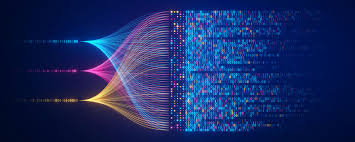
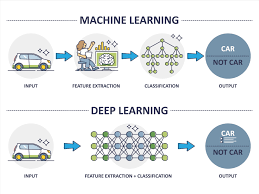
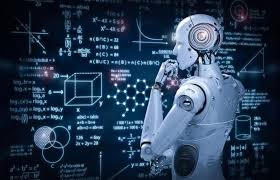
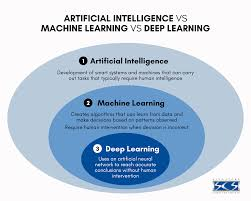
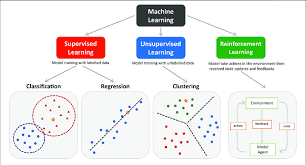

In [34]:
imagetags2 = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for i in imagetags2:
    Machinelearning.append(i.get_attribute('src'))
    
Machinelearning[10:]

In [35]:
driver.quit()

In [41]:
#guitar
driver=webdriver.Chrome()
driver.get("https://www.google.co.in/")
finder = driver.find_element(By.XPATH, '//textarea[@class="gLFyf"]')
finder.send_keys('Guitar')
time.sleep(5)

In [42]:
search2 = driver.find_element(By.XPATH, '//input[@class="gNO89b"]')
search2.click()
time.sleep(5)
imageselector=driver.find_element(By.XPATH,'//div[@class="crJ18e"]/div[2]/a')
imageselector.click()

In [43]:
GuitarImages=[]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToDGP9QQAeDs83c8iu2D5UPAUJzVNR7UbHvQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQnNnGTgrtN3H6OzRv_DfZJxkbU4-dLNg20A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwAdoibk7daqIitkwbiCy7idVeQE3UAqzD_Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmmxrK3RKpn3O_i8gcDIsLi3mPn6La_XVuWg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqmRRnrbpJcjU_NooKPFf9xHVSsj41TOWQZw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcR_s9iaMBvhHTzEy5xAH-smKSRKX5DKWtiQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1FQR2c3f6A4B8M7E96XF4l0C4_zlJm2VRtA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmRoZDDn2cEoyTljn9mFbd_GSIvKpaiyFb4Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLlpq9cshue0yYfxWmKJoW3O3tarbYZOExZQ&usqp=CAU',
 'https://encr
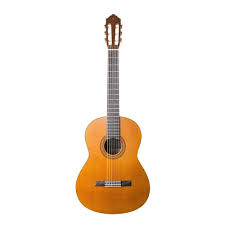
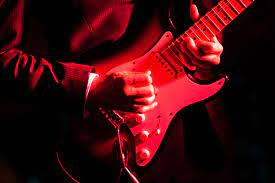
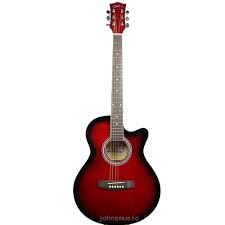
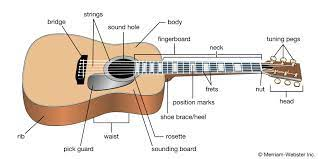
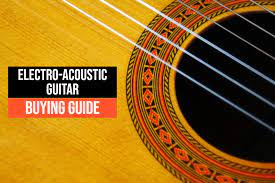
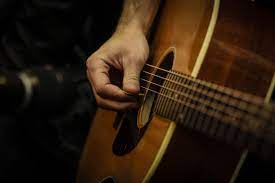
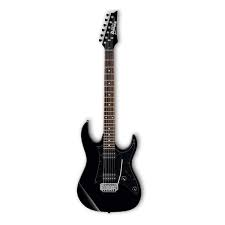
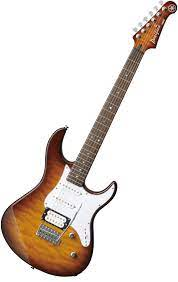
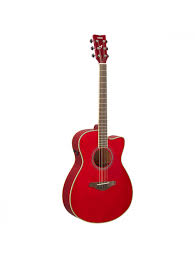
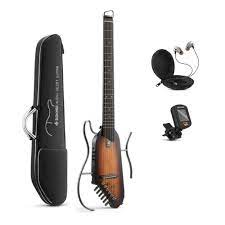

In [45]:
imagetags2 = driver.find_elements(By.XPATH, '//div[@class="fR600b islir"]/img')

for i in imagetags2:
    GuitarImages.append(i.get_attribute('src'))
    
GuitarImages[10:]

In [53]:
driver.quit()

In [54]:
#Cakes
driver=webdriver.Chrome()
driver.get("https://www.google.co.in/")
finder = driver.find_element(By.XPATH, '//textarea[@class="gLFyf"]')
finder.send_keys('Cakes')
time.sleep(5)

In [55]:
search2 = driver.find_element(By.XPATH, '//input[@class="gNO89b"]')
search2.click()
time.sleep(5)
imageselector=driver.find_element(By.XPATH,'//div[@class="crJ18e"]/div[2]/a')
imageselector.click()

In [56]:
Cakeimages=[]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzVvNmcG6XK_Jz4tXh6SA-3wfxxgKLZ-g8KA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqX90oX_bxy3RyY5FSHdrDF-HbZlSbAaztrg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVwzYvlLk5KC3NEskBIiKjM_1RVBbCDM25qA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmrMnQ3Cui_PJmY79wJtTS9IkIHB4ecLgk0w&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSyeduXY3q83Bgdon8nWee0PnX1H2peCDZxA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkQV0aoavwUaqNvU4QKVmOiI2OqsdEo_lx0Q&s',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4kX59WSqdAaX8bic85qKYihq9PJZjJP58Iw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKdwi2FfFtOcykQRNLFTVmDz3T7ZnNtvGaMw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYcCzWv726HRRGENj5f1leXAa168km9
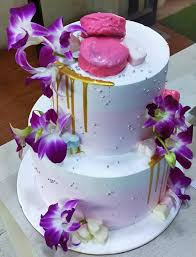
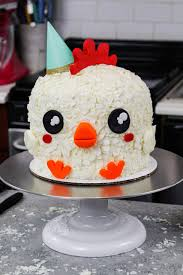
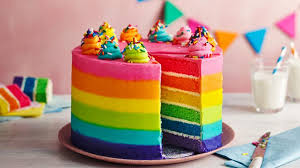
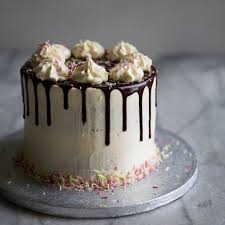
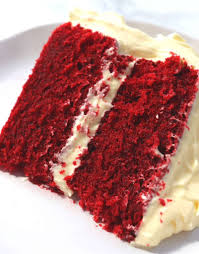
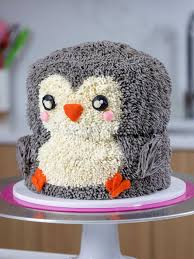
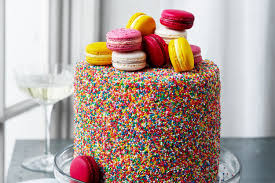
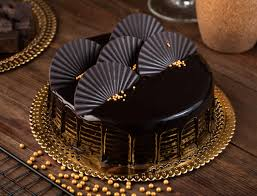
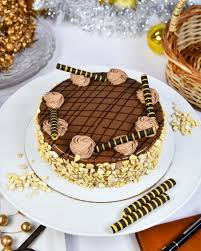
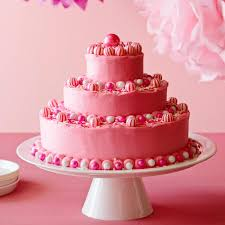

In [58]:
imagetags2 = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for i in imagetags2:
    Cakeimages.append(i.get_attribute('src'))
    
Cakeimages[10:]

In [59]:
driver.quit()

In [60]:
#q4 smartphone
driver=webdriver.Chrome()
driver.get("https://www.flipkart.com/")

In [61]:
smartphone = driver.find_element(By.XPATH, '//input[@class="Pke_EE"]')
smartphone.send_keys('IPHONE')
smartphone.send_keys(Keys.ENTER)


In [62]:
MobileName=[]
BrandName=[]
Price=[]
Storage=[]
ProductUrl=[]
color=[]

In [63]:
Nametags=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
detailstag=driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
Ratetag=driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
urltag=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')

for i in Nametags:
    MobileName.append(i.text)
    text = i.text
    BrandName.append(text.split()[0])
for i in urltag:
    ProductUrl.append(i.get_attribute('href'))
for i in Ratetag:
    Price.append(i.text)


In [64]:
for name in MobileName:
    parts = name.split('(')
    if len(parts) > 1:
        color_storage = parts[1].split(',')
        color.append(color_storage[0].strip())
        if len(color_storage) > 1:
            Storage.append(color_storage[1].split()[0].strip())
        else:
            Storage.append("-")
    else:
        color.append("-")
        Storage.append("-")


In [65]:
df2 = pd.DataFrame({
    'MobileName': MobileName,
    'BrandName': BrandName,
    'Storage': Storage,
    'Price': Price,
    'ProductUrl': ProductUrl
})

df2


,MobileName,BrandName,Storage,Price,ProductUrl
0,"Apple iPhone 15 (Blue, 128 GB)",Apple,128,"₹65,999",https://www.flipkart.com/apple-iphone-15-blue-...
1,"Apple iPhone 14 (Midnight, 128 GB)",Apple,128,"₹56,999",https://www.flipkart.com/apple-iphone-14-midni...
2,"Apple iPhone 14 (Blue, 128 GB)",Apple,128,"₹55,999",https://www.flipkart.com/apple-iphone-14-blue-...
3,"Apple iPhone 14 (Starlight, 128 GB)",Apple,128,"₹56,999",https://www.flipkart.com/apple-iphone-14-starl...
4,"Apple iPhone 15 (Black, 128 GB)",Apple,128,"₹66,999",https://www.flipkart.com/apple-iphone-15-black...
5,"Apple iPhone 14 (Purple, 128 GB)",Apple,128,"₹56,999",https://www.flipkart.com/apple-iphone-14-purpl...
6,"Apple iPhone 15 (Green, 128 GB)",Apple,128,"₹66,999",https://www.flipkart.com/apple-iphone-15-green...
7,"Apple iPhone 13 (Pink, 128 GB)",Apple,128,"₹52,999",https://www.flipkart.com/apple-iphone-13-pink-...
8,"Apple iPhone 13 (Green, 128 GB)",Apple,128,"₹52,999",https://www.flipkart.com/apple-iphone-13-green...
9,"Apple iPhone 13 (Starlight, 128 GB)",Apple,128,"₹52,999",https://www.flipkart.com/apple-iphone-13-starl...


In [66]:
driver.quit()

In [67]:
#q5
driver=webdriver.Chrome()
driver.get('https://www.google.com/maps')

In [68]:
locationsearch=driver.find_element(By.XPATH,'//input[@id="searchboxinput"]')
locationsearch.send_keys('Bangalore')
locationsearch.send_keys(Keys.ENTER)

In [69]:
url = driver.current_url
detail=url.split('@')[1].split(',')
lat=detail[0]
long=detail[1]
print("lattitude - ",lat)
print("Longitude - ",long)

lattitude -  13.0711552
Longitude -  80.2258944


In [70]:
driver.quit()

In [71]:
#Q6
driver=webdriver.Chrome()
driver.get('https://www.digit.in')

In [72]:
laptopsearch=driver.find_element(By.XPATH,'//input[@id="woocommerce-product-search-field-0"]')
laptopsearch.send_keys('Laptops')

In [73]:
searchkey=driver.find_element(By.XPATH,'//button[@class="btnsearch hideonmobile"]')
searchkey.click()

In [84]:
lapname=[]
Rate=[]


In [85]:
lapnametag=driver.find_elements(By.XPATH,'//h3[@class=" text-clamp text-clamp-2"]/a')
pricetag=driver.find_elements(By.XPATH,'//span[@class="woocommerce-Price-amount amount"]/bdi')

for i in lapnametag:
    lapname.append(i.text)
    
for i in pricetag:
    Rate.append(i.text)


In [94]:
df6 = pd.DataFrame({
    'Laptop Name': lapname[:5],
    'Price': Rate
})

df6

,Laptop Name,Price
0,Lenovo IdeaPad Gaming 3 15IAH7,"₹79,831.00"
1,Lenovo IdeaPad Gaming 3i,"₹174,990.00"
2,Alienware x14 Gaming Laptop,"₹91,204.00"
3,HP Envy x360,"₹55,990.00"
4,Dell Vostro 3510 11th Gen Core i5-1135G7 512 GB,"₹328,800.00"


In [95]:
driver.quit()

In [138]:
#q8
driver=webdriver.Chrome()
driver.get('https://www.youtube.com/watch?v=qoq8B8ThgEM&ab_channel=YRF')

In [141]:
time.sleep(20)
commentstag=driver.find_elements(By.XPATH,'//ytd-comment-thread-renderer[@class="style-scope ytd-item-section-renderer"]')
comments=[]
for i in commentstag:
    comments.append(i.text)
comments

['Pinned by YRF\n@yrf\n4 months ago\nTiger and Zoya 🫶 Watch #Ruaan Song now - https://youtu.be/OPazrdwYAm0\n2.5K\nReply\n106 replies',
 "@achievezone2007\n2 years ago (edited)\nMarch 2024,let's see how many people are listening to this masterpiece.\n64K\nReply\n541 replies",
 '@sivakalasivakala8717\n2 months ago\nKon kon dekho on 2024\n8.9K\nReply\n313 replies',
 '@zimsonraj164\n3 days ago\n2024 கேட்கிறேன் எனக்கு இந்த பாடல் மிகவும் பிடிக்கும் \n36\nReply',
 '@KaranSingh-wj6vs\n4 days ago (edited)\nLet see how many people is  listening this song in  2024\n120\nReply\n3 replies',
 "@TheHasibur\n3 years ago (edited)\nThis song never gets old \nLet's see how many people are watching 2024\n29K\nReply\n439 replies",
 '@sudeeppoojary9993\n1 year ago\nWhen I was kid - saw the song\nWhen I am adult - feel the song\n17K\nReply\n175 replies',
 '@JOBLOCATIONFROMBD\n2 days ago\nMarch 2024 kon kon suntha hei\n40\nReply\n4 replies',
 '@krishnaaa694\n2 days ago\nAugust 2030 how many people are listeni

In [142]:
driver.quit()

In [102]:
#Q9
driver=webdriver.Chrome()
driver.get('https://www.hostelworld.com')

In [103]:
enterlocation=driver.find_element(By.XPATH,'//input[@class="native-input"]')
enterlocation.send_keys('london, England')

time.sleep(2)

selectloc=driver.find_element(By.XPATH,'//li[@class="item is-two-row"]')
selectloc.click()

searchhostel=driver.find_element(By.XPATH,'//button[@class="btn-content large-button"]')
searchhostel.click()


In [129]:
HostelName=[]
DistancefromCity=[]
Ratings=[]
TotalReview=[]
OverallReview=[]


In [130]:
hostelnametag=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')

for i in hostelnametag:
    HostelName.append(i.text)

In [131]:
Distancetag=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
for i in Distancetag:
    DistancefromCity.append(i.text)

In [132]:
Ratingstag=driver.find_elements(By.XPATH,'//span[@class="number"]')
for i in Ratingstag[2:]:
    Ratings.append(i.text)

In [133]:
TotalRatingstag=driver.find_elements(By.XPATH,'//span[@class="left-margin"]')
for i in TotalRatingstag:
    TotalReview.append(i.text)

In [134]:
OverallRatingstag=driver.find_elements(By.XPATH,'//span[@class="keyword"]')
for i in OverallRatingstag[2:]:
    OverallReview.append(i.text)



In [135]:
df9=pd.DataFrame({
   "HostelName":HostelName,
    "Distance From City" :DistancefromCity,
    "Total no of Review":TotalReview,
    "Ratings":Ratings,
    "Overall Review":OverallReview,
 
})

df9

,HostelName,Distance From City,Total no of Review,Ratings,Overall Review
0,Wombat's City Hostel London,- 3.6km from city centre,(16140),9.2,Superb
1,Palmers Lodge - Swiss Cottage,- 6.5km from city centre,(16051),8.7,Fabulous
2,Onefam Notting Hill,- 5.5km from city centre,(2704),9.6,Superb
3,Urbany Hostel London,- 5.4km from city centre,(1186),9.6,Superb
4,NX London Hostel,- 6.1km from city centre,(2252),8.9,Fabulous
5,Generator London,- 3km from city centre,(8138),7.5,Very Good
6,St Christopher's Village,- 1.8km from city centre,(12966),7.6,Very Good
7,Onefam Waterloo,- 0.7km from city centre,(230),9.6,Superb
8,Clink261,- 3.2km from city centre,(570),8.3,Fabulous
9,Safestay London Elephant & Castle,- 1.7km from city centre,(5315),7.4,Very Good


In [128]:
len(HostelName), len(DistancefromCity), len(TotalReview), len(Ratings), len(OverallReview)


(28, 30, 30, 30, 30)

In [137]:
driver.quit()